In [1]:
import pandas as pd
import numpy as np
from random import random, normalvariate
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


/apps/software/standard/core/anaconda/2019.10-py3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
###############################
#This analysis document contains similar plots to Analysis of Topics for LDA
#It creates graphics for showing trends in topics, such as:
#Average proportion of a topic per document (both between topics as well as for each topic over years)
#Total funding for a topic (both between topics as well as for each topic over years)

#NMF model is the NMF 44 topic model chosen after numtopictune
#Be careful with totals for years with incomplete data (e.g. 2019).

#This analysis folder also shows you how to choose the most represerntative topic for a document, and plots this across years

In [43]:
os.chdir('/home/sc2pg/src/prnd/publicrd/data/prd/RND Topic Modelling') 
save_path='/home/sc2pg/src/prnd/publicrd/graphics/'

In [3]:
def clean_up_tokens(doc):
    """works with keep_token to create a subset of tokens meeting strict criteria for inclusion--directly impacts modelling"""
    kept_tokens=[]
    if type(doc)!=list:
        return np.nan
    else:
        for token in doc:
            keep,altered_token=keep_token(token)
            if keep:
                kept_tokens.append(altered_token)
        return kept_tokens
        
def keep_token(token):
    """returns whether a token meets the criteria to be retained, and if so, as what"""
    token=token.strip('- ') #Removes leading and trailing hyphens
    token=token.replace('-','_')
    if not str.isalnum(token):
        token=re.sub(r'\W+', '', token)
    token=token.strip('_')
    #Names of universities
    if 'university' in token or 'college' in token or 'universities' in token:
        return (not token in college_tokens, token)
    if str.isnumeric(token):
        #keep years
        return (len(token)==4,token)
    else:
        #Keep anything that is alphanumeric or alpha if its over length 2--allows mixed types e.g. h1n1
        return (len(token)>=2,token)



#Tokens found in id2word dictionary from Preprocessing. Items which 
college_tokens=[#'college',
'aga_khan_university',
'ahmadu_bello_university',
'alabama_aamp_university',
'albert_einstein_college',
'alcorn_state_university',
'american_college_obstetricians',
'american_college_surgeons',
'americancollege',
#'amongcollege',
#'anduniversity',
'anne_molloy_trinity_college',
#'atuniversity',
'auburn_university',
'auburn_university_alabama',
'auburn_university_au',
'auburn_university_auburn',
'auburn_university_montgomery',
'auburn_university_tuskegee_university',
'augustana_college',
#'auniversity',
'babes_bolyai_university',
'barnard_college',
'baruch_college',
'bates_college',
'baylor_college',
'baylor_college_dentistry',
'baylor_college_medicine',
'baylor_college_ofmedicine',
'baylor_collegeof',
'baylorcollege_medicine',
'baylorcollege_medicine_bcm',
'ben_gurion_university',
'benedict_college',
'benedict_college_historically_black',
'berea_college',
'binghamton_university',
#'black_colleges',
'board_trinity_college',
'bostonuniversity',
'bowdoin_college',
'brownuniversity',
'bryn_mawr_college',
'bucknell_university',
#'cape_universities',
'cardiff_university',
'carleton_college',
'carnegie_mellon_university',
'carver_college',
'carver_college_medicine',
'case_western_reserveuniversity',
'case_westernreserve_university',
'catholic_university',
'cerritos_college',
'charles_drew_university',
'chulalongkorn_university',
'chulalongkorn_university_bangkok_thailand',
'claflin_university',
'claremont_colleges',
'clark_atlanta_university',
'colby_college',
'colby_sawyer_college',
#'college',
#'college',
#'college_american_pathologists',
#'college_arts',
#'college_arts_sciences',
'college_brockport',
'college_dentistry_nyucd',
'college_dentistry_ufcd',
#'college_goer',
#'college_graduates',
#'college_letters',
#'college_letters_arts_sciences',
#'college_letters_sciences',
'college_lewiston',
#'college_liberal_arts',
'college_london',
'college_medicine_aecom',
'college_medicine_uccom',
'college_menominee_nation',
#'college_optometry',
#'college_osteopathic_medicine',
'college_park_umcp',
'college_park_umd',
#'college_physicians_surgeons',
#'college_rheumatology_acr',
'college_south_hadley',
#'college_sports_medicine',
'college_st_scholastica',
'college_staten_island',
#'college_students_basics',
#'college_veterinary_medicine',
#'college_veterinary_pathologists',
#'college_veterinarymedicine',
'college_wcmc',
'college_wcmc_rockefeller_university',
'college_william_mary',
'college_wisconsin_mcw',
'college_wooster',
#'collegeand',
#'collegeof',
#'collegeof_medicine',
#'colleges',
#'colleges_arts_sciences',
#'colleges_chicago',
#'colleges_dentistry',
#'colleges_dentistry_medicine',
#'colleges_optometry',
'colleges_rcc_umb', #Iffy--not sure what this is
#'colleges_schools',
#'colleges_universities',
#'colleges_universities_hacu',
#'collegesand',
#'collegestudent',
'columbia_university',
'columbiauniversity',
'comanche_nation_college',
#'communitycollege',
'creighton_university',
'cross_university',
'cross__university',
'cuny_hunter_college',
'del_mar_college',
'depaul_university',
'dine_college',
'din_college',
'diné_college',
'diplomate_american_college',
'doane_college',
'doron_levy_university_maryland',
'dukeuniversity',
'eckerd_college',
'emoryuniversity',
'famu_fsu_college',
'fort_lewis_college',
'franklin_marshall_college',
'fudan_university',
'fudan_university_shanghai',
'fudan_university_shanghai_china',
'gallaudet_university',
'george_mason_university',
'george_washington_university',
'georgetown_howard_universities',
'georgetown_university',
'georgia_regents_university',
'gettysburg_college',
#'grant_universities_aplu',
'gu_howard_university',
'hackensack_university',
'hampton_university',
'hanyang_university',
'hartnell_college',
'harvarduniversity',
'harvey_mudd_college',
#'historically_black_college',
#'historically_black_colleges',
#'historically_black_colleges_universities',
'hokkaido_university',
'hold_bates_college',
'hold_colby_sawyer_college',
'hold_stonehill_college_easton',
'honors_college',
'houston_baylor_college',
'hunter_college',
'imperial_college',
'imperial_college_london',
'imperial_college_london_uk',
#'incollege',
'indiana_university',
'indianauniversity',
#'inspect_certified_college',
#'inter_college',
#'inter_university',
#'inter_university_consortium_political',
#'interuniversity',
#'interuniversity_consortium_political',
#'intra_university',
'james_cook_university',
'james_madison_university',
'jeffersonuniversity',
'john_jay_college',
'johns_hopkinsuniversity',
'kennesaw_state_university',
'king_college_london',
'kwame_nkrumah_university',
'kyoto_university',
'kyushu_university',
'langston_university',
'lehman_college',
'lehman_college_city',
'lehman_college_cuny',
'lemoyne_owen_college',
'lewis_clark_college',
#'liberal_art_college',
'louisiana_universities_marine',
'loyola_marymount_university',
'loyola_university',
'loyola_university_chicago',
'macalester_college',
'makerere_university',
'makerere_university_kampala_uganda',
'makerere_university_uganda',
'makerereuniversity',
'marquette_university',
'marquette_university_milwaukee',
'mbarara_university',
'mcgill_university',
'mcmaster_university',
'medgar_evers_college',
'medical_colleges_aamc',
'medicalcollege',
'medicaluniversity_south_carolina',
'medicine_yeshiva_university',
'meharrymedical_college',
'mellon_university',
'mellonuniversity',
'mexico_highlands_university',
'miami_dade_college',
'middlebury_college',
'millsaps_college',
'monash_university',
'monash_university_australia',
#'montana_tribal_college',
#'montana_tribal_colleges',
'montclair_state_university',
'morehouse_college',
'morehouse_college_spelman_college',
'mount_holyoke_college',
'msm_tuskegee_university',
'mt_marty_college',
'muhimbili_university',
#'multi_university',
#'muniversity',
'nakoda_college',
'nanyang_technological_university',
'nazarene_university',
'nazareth_college',
#'non_college',
#'non_university',
'northern_arizona_university',
'northern_kentucky_university',
'northshore_university',
'northshore_university_healthsystem',
'northwest_nazarene_university',
'northwestern_university',
'norwich_university',
#'ofuniversity',
'oglala_lakota_college',
'ohio_stateuniversity',
'old_dominion_university',
'olin_college',
#'otheruniversity',
#'participatinguniversity',
'pasadena_city_college',
'peking_university',
'peking_university_beijing_china',
'pennsylvania_college_optometry',
#'phduniversity',
#'polytechnic_university',
#'post__college',
'prairie_view_university',
#'pre_college',
#'pre_university',
#'pre__college',
#'precollege',
'queens_college',
'regents_university',
'researchuniversity',
'rockefeller_university',
'rockefeller_university_memorial_sloan',
'rockefeller_university_ru',
'rockefeller_university_weill_cornell',
'rockefelleruniversity',
'royal_college_surgeons',
'rutgers_university',
'rutgersuniversity',
'saddleback_college',
'saginaw_chippewa_tribal_college',
'saint_michael_college',
'salish_kootenai_college',
'salve_regina_university',
'sawyer_college',
#'scienceuniversity', #This is likely ohsu, as bellow, but for parsimony, this is kept
'scienceuniversity_ohsu',
'serc_carleton_college',
'shams_university',
'shams_university_cairo_egypt',
'shanghai_jiaotong_university',
'simon_fraser_university',
'sinte_gleska_university',
'sisseton_wahpeton_college',
'sitting_bull_college',
'skc_tribal_college',
'sokoine_university',
'south_africa_university_witwatersrand',
'southern_illinois_university_carbondale',
'southern_illinois_university_edwardsville',
'southern_methodist_university',
'spelman_college',
'st_edward_university',
'st_mary_college',
'st_olaf_college',
'st_philip_college',
'stanforduniversity',
'state_university_dominguez', #Specific university
#'stateuniversity', #This could be any state
'stellenbosch_university',
'stellenbosch_university_south_africa',
'stonehill_college',
'stonehill_college_easton_massachusetts',
'stony_brook_university',
'swarthmore_college',
'tarrant_county_college',
'tel_aviv_university',
'templeuniversity',
'texas_a_university',
'texas_southmost_college',
'texas_university_kingsville',
#'thecollege',
#'theuniversity',
'theuniversity_california_san',
'theuniversity_colorado',
'theuniversity_maryland',
'theuniversity_michigan',
'theuniversity_minnesota',
'theuniversity_north_carolina',
'theuniversity_pennsylvania',
'theuniversity_pittsburgh',
'tougaloo_college',
#'touniversity',
#'triangle_universities_nuclear', #this is a government research center
#'tribal_college',
'tribal_college_haskell_indian', #specific university
#'tribal_colleges',
#'tribal_colleges_universities',
#'tribal_colleges_universities_tcus',
'trinity_college',
'trinity_college_arts_sciences',
'trinity_college_dublin',
'tsinghua_university',
'tsinghua_university_beijing',
'tsinghua_university_beijing_china',
'tsinghua_university_china',
#'tsinghua_university_prof_roberto',
'tulaneuniversity',
'tuskegee_universities',
'tuskegee_university',
'tuskegee_university_hbcu',
'uams_colleges',
'ucsf_makerere_university',
'umbc_university_maryland',
'uniformed_services_university',
'united_negro_college',
#'universities',
#'universities_aau', #this is an association of universities, not a university
#'universities_hbcu',
'universities_kansas_ku',
#'universitiesand',
#'universitiesin',
#'university',
#'university',
'university_alabama_birmingham',
'university_alabama_huntsville',
'university_alabama_tuscaloosa',
'university_alabama_ua',
'university_alaska_anchorage',
'university_alaska_fairbanks',
'university_albany_suny',
'university_arizona_ua',
'university_arkansas_fayetteville',
'university_arkansas_pine',
'university_arkansas_ua',
'university_buffalo_suny',
'university_buffalo_ub',
'university_california_berkeley',
'university_california_davis',
'university_california_irvine',
'university_california_los',
'university_california_merced',
'university_california_riverside',
'university_california_san',
'university_california_sanfrancisco',
'university_california_santa',
'university_cincinnati_cincinnati',
'university_college_dublin',
'university_college_london',
'university_colorado_anschutz',
'university_colorado_boulder',
'university_colorado_denver',
'university_connecticut_uconn',
'university_feinberg_school',
'university_florida_gainesville',
'university_florida_uf',
'university_fullerton_csuf',
'university_georgia_athens',
'university_georgia_uga',
'university_hawaii_hilo',
'university_hawaii_manoa',
'university_hawaii_uh',
'university_hospitals_cleveland',
'university_houston_downtown',
'university_houston_uh',
'university_illinois_chicago',
'university_illinois_urbana',
'university_indianapolis_iupui',
'university_kansas_ku',
'university_kansas_lawrence',
'university_kingsville',
'university_langone_medical',
'university_louisiana_lafayette',
'university_louisiana_monroe',
'university_maryland',
'university_maryland_baltimore',
'university_maryland_baltimore_county',
'university_maryland_baltimore_umb',
'university_maryland_eastern_shore',
'university_maryland_greenebaum',
'university_maryland_marlene_stewart', 
'university_maryland_umd',
'university_massachusetts_amherst',
'university_massachusetts_dartmouth',
'university_massachusetts_lowell',
'university_massachusetts_umass',
'university_miami_miller',
'university_miami_um',
'university_michigan_ann',
'university_michigan_dearborn',
'university_michigan_um',
'university_minnesota',
'university_minnesota_duluth',
'university_minnesota_masonic',
'university_minnesota_minneapolis',
'university_minnesota_twin',
'university_minnesota_umn',
'university_missouri__columbia',
'university_missouri_columbia',
'university_missouri_kansas',
'university_missouri_mu',
'university_missouri_rolla',
'university_missouri_st',
'university_nebraska_lincoln',
'university_nebraska_omaha',
'university_nevada_las',
'university_nevada_reno',
'university_northcarolina_chapel',
'university_northridge_csun',
'university_ofalabama',
'university_ofcalifornia',
'university_ofcolorado',
'university_ofmichigan',
'university_ofminnesota',
'university_ofpennsylvania',
'university_ofrochester',
'university_oftexas',
'university_ofwashington',
'university_ofwashington_uw',
'university_ofwisconsin',
'university_ofwisconsin_madison',
'university_oklahoma_norman',
'university_oklahoma_ou',
'university_pennsylvania_upenn',
'university_pittsburgh_pitt',
'university_singapore_nus',
'university_singapore_singapore',
'university_tennessee_chattanooga',
'university_tennessee_knoxville',
'university_tennessee_memphis',
'university_texas_arlington',
'university_texas_austin',
'university_texas_brownsville',
'university_texas_dallas',
'university_texas_el',
'university_texas_pan',
'university_texas_rio',
'university_texas_southwestern',
'university_texas_tyler',
'university_toronto_toronto',
'university_venda',
'university_vermont_burlington',
'university_vermont_uvm',
'university_virginia_charlottesville',
'university_virginia_uva',
'university_washington_seattle',
'university_washington_uw',
'university_waterloo',
'university_west_indies',
'university_wisconsin_carbone',
'university_wisconsin_eau',
'university_wisconsin_madison',
'university_wisconsin_milwaukee',
'university_wisconsin_oshkosh',
'university_wisconsin_platteville',
'university_wisconsin_stout',
'university_witwatersrand',
'university_witwatersrand_south_africa',
'university_witwatersrand_wits',
#'universityabstract',
#'universityand',
#'universitycareer',
#'universityco',
#'universityhospitals',
#'universityin',
#'universityintellectual',
#'universitymedical',
#'universityof',
'universityof_california_san',
'universityof_chicago',
'universityof_colorado',
'universityof_kentucky',
'universityof_michigan',
'universityof_minnesota',
'universityof_pennsylvania',
'universityof_pittsburgh',
'universityof_washington',
#'universityproposal',
#'universityresources',
#'universitys',
#'universityschool_medicine',
#'universitytitle',
'urmc_college_arts',
'vanderbiltuniversity',
'virginia_commonwealth_university',
'wake_forest_university',
'washingtonuniversity',
'wayne_stateuniversity',
'weinberg_college_arts',
'wellesley_college',
'wesley_college',
'western_ontario_mcmaster_universities',
'western_ontario_mcmasters_universities',
'westminster_college',
#'withuniversity',
'xiamen_university',
'xiamen_university_china',
'yaleuniversity',
'yeshiva_university',
'yonsei_university',
'yonsei_university_seoul_south',
'yorkuniversity']

In [4]:
nmf=pd.read_pickle('NMFChosenModelpkl.pkl')

In [5]:
nmf=pd.DataFrame(nmf,columns=['Topic_'+str(x) for x in range(44)]) #The topic distribution for each document in NSF data

In [6]:
#Tokened abstracts and associated data
raw_df=pd.read_pickle('./processed_dataset_stanford_lemma.pkl')
#raw_df['final_tokens']=raw_df['tns_bi_tri_docs'].apply(clean_up_tokens) If for some reason you need the final_tokens for analysis, the pickle of them is one step away --see clean_up_tokens function

In [7]:
nsf=raw_df.groupby('AGENCY').get_group('NSF')
nsf.drop(['original index', 'PROJECT_ID','FIRST_CHAR',
       'LAST_CHAR',   'IC_CENTER', 'PROJECT_NUMBER',
       'working_abstract', 'nchar', 'Start Char', 'Field Count',
       'lemma_docs_with_stop', 'tokened_docs_nostop', 'tns_bi_tri_docs',
       ],inplace=True,axis=1)

/home/sc2pg/.local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
#Each document and its topic distributions
df=pd.concat([nsf.reset_index(),nmf],axis=1)

In [9]:
n_topics=44
titles=["Computational Modelling",
"STEM Careers",
"Chemistry",
"Ocean Sciences",
"Conferences",
"Geometric Topology",
"Medical Biology",
"Big Data",
"Network Communication",
"Political Science/Policy",
"Optics",
"Computation",
"Primary/Secondary Education",
"Solid-State Physics/Material Engineering",
"Learning and Teaching",
"Quantum Mechanics",
"Mathematics Instruction",
"Travelling Fellowships",
"Climate Change",
"Linguistics",
"Molecular Biology",
"Workshops",
"Watershed Management",
"REU",
"Renewable Energy",
"Engineering",
"Soil Science",
"Plate Tectonics",
"Genetics",
"Algorithm Analysis",
"Neuroscience",
"Astronomy and Galaxy Formation",
"Evolutionary Biology",
"Robotics",
"Fluid Dynamics",
"Particle/Nuclear Physics",
"Software Development",
"Polymers and Material Science",
"International Collaborations",
"Cybersecurity",
"University Offerings",
"Innovation",
"Membrane Science",
"Electrical Engineering"]
title_dict={}
for i,j in enumerate(titles):
    title_dict['Topic_'+str(i)]=j

In [46]:
#Put data into tidy format
melted=df.melt(value_vars=['Topic_'+str(x) for x in range(n_topics)],id_vars=['AGENCY','FY_TOTAL_COST','FY'],var_name='Topic',value_name='Topic Proportion')
#Calculate proportion of project funding that went towards a particular topic
melted['Topic Funding']=melted['FY_TOTAL_COST']*melted['Topic Proportion']
melted['T']=melted['Topic'].apply(lambda x: title_dict[x])

agencies=['NSF']#Add whichever agencies you think are important in the order you'd like


#Create a melted database that shows the mean for each topic by agency
melted_means=df.groupby('AGENCY')[['Topic_'+str(x) for x in range(n_topics)]].mean().loc[agencies].reset_index().melt(value_vars=['Topic_'+str(x) for x in range(n_topics)],id_vars=['AGENCY'],var_name='Topic',value_name='Topic Proportion')


melted_totals=pd.DataFrame(melted.groupby(['AGENCY','T'])['Topic Funding'].sum()).reset_index()
melted_totals['Scaled Funding (Millions, USD)']=melted_totals.apply(lambda x: x['Topic Funding']/10**7,axis=1)


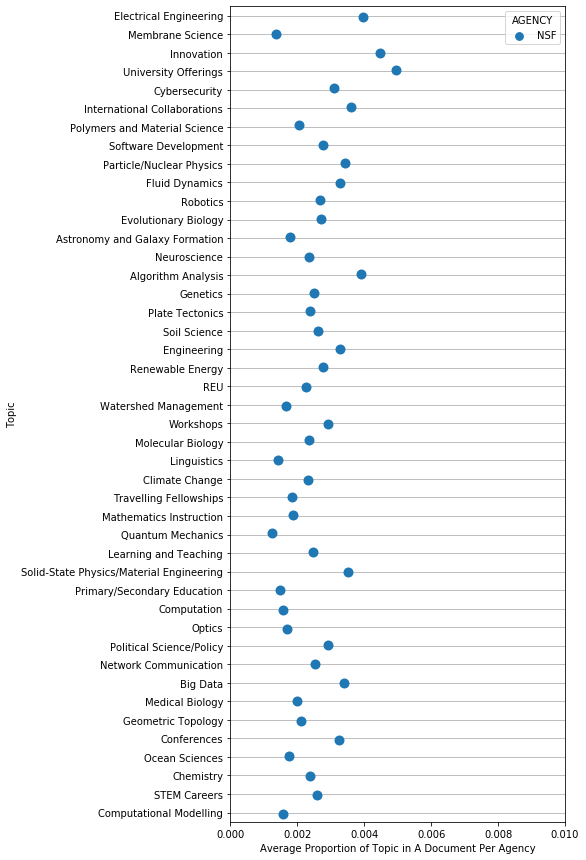

In [48]:
###############

#Mean on each topic by agency
fig=plt.figure(figsize=(6,15))
g=sns.stripplot(data=melted_means,y='Topic',x='Topic Proportion',hue='AGENCY',size=10)
plt.xlim(0,.01)
locs,labels=plt.yticks()
plt.yticks(locs,titles)
g.yaxis.grid(True)
plt.xlabel('Average Proportion of Topic in A Document Per Agency')
plt.ylim(locs[0]-.5, locs[-1]+.5)
plt.savefig(save_path+'AverageProportionDocumentNMF44NSF.png',bbox_inches='tight',dpi=400)

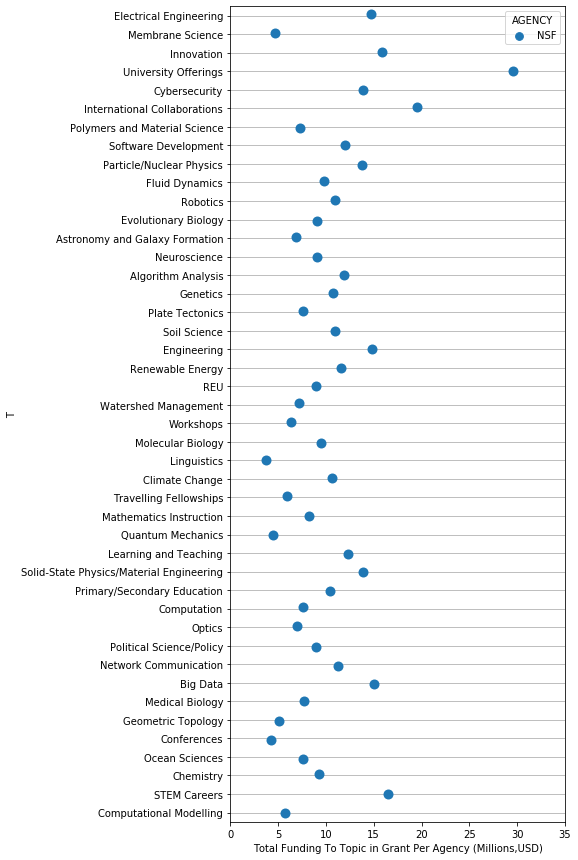

In [47]:
#Sum of funding on each topic by agency

#Same plot as above, but sum of funding for 
fig=plt.figure(figsize=(6,15))
g=sns.stripplot(data=melted_totals,y='T',x='Scaled Funding (Millions, USD)',hue='AGENCY',size=10,order=titles)
locs,labels=plt.yticks()
plt.ylim(locs[0]-.5, locs[-1]+.5)
plt.yticks(locs,titles)
g.yaxis.grid(True)
plt.xlim(0,35)
plt.xlabel('Total Funding To Topic in Grant Per Agency (Millions,USD)')
plt.savefig(save_path+'Overall Funding Per Topic NSF NMF 44.png',bbox_inches='tight',dpi=400)

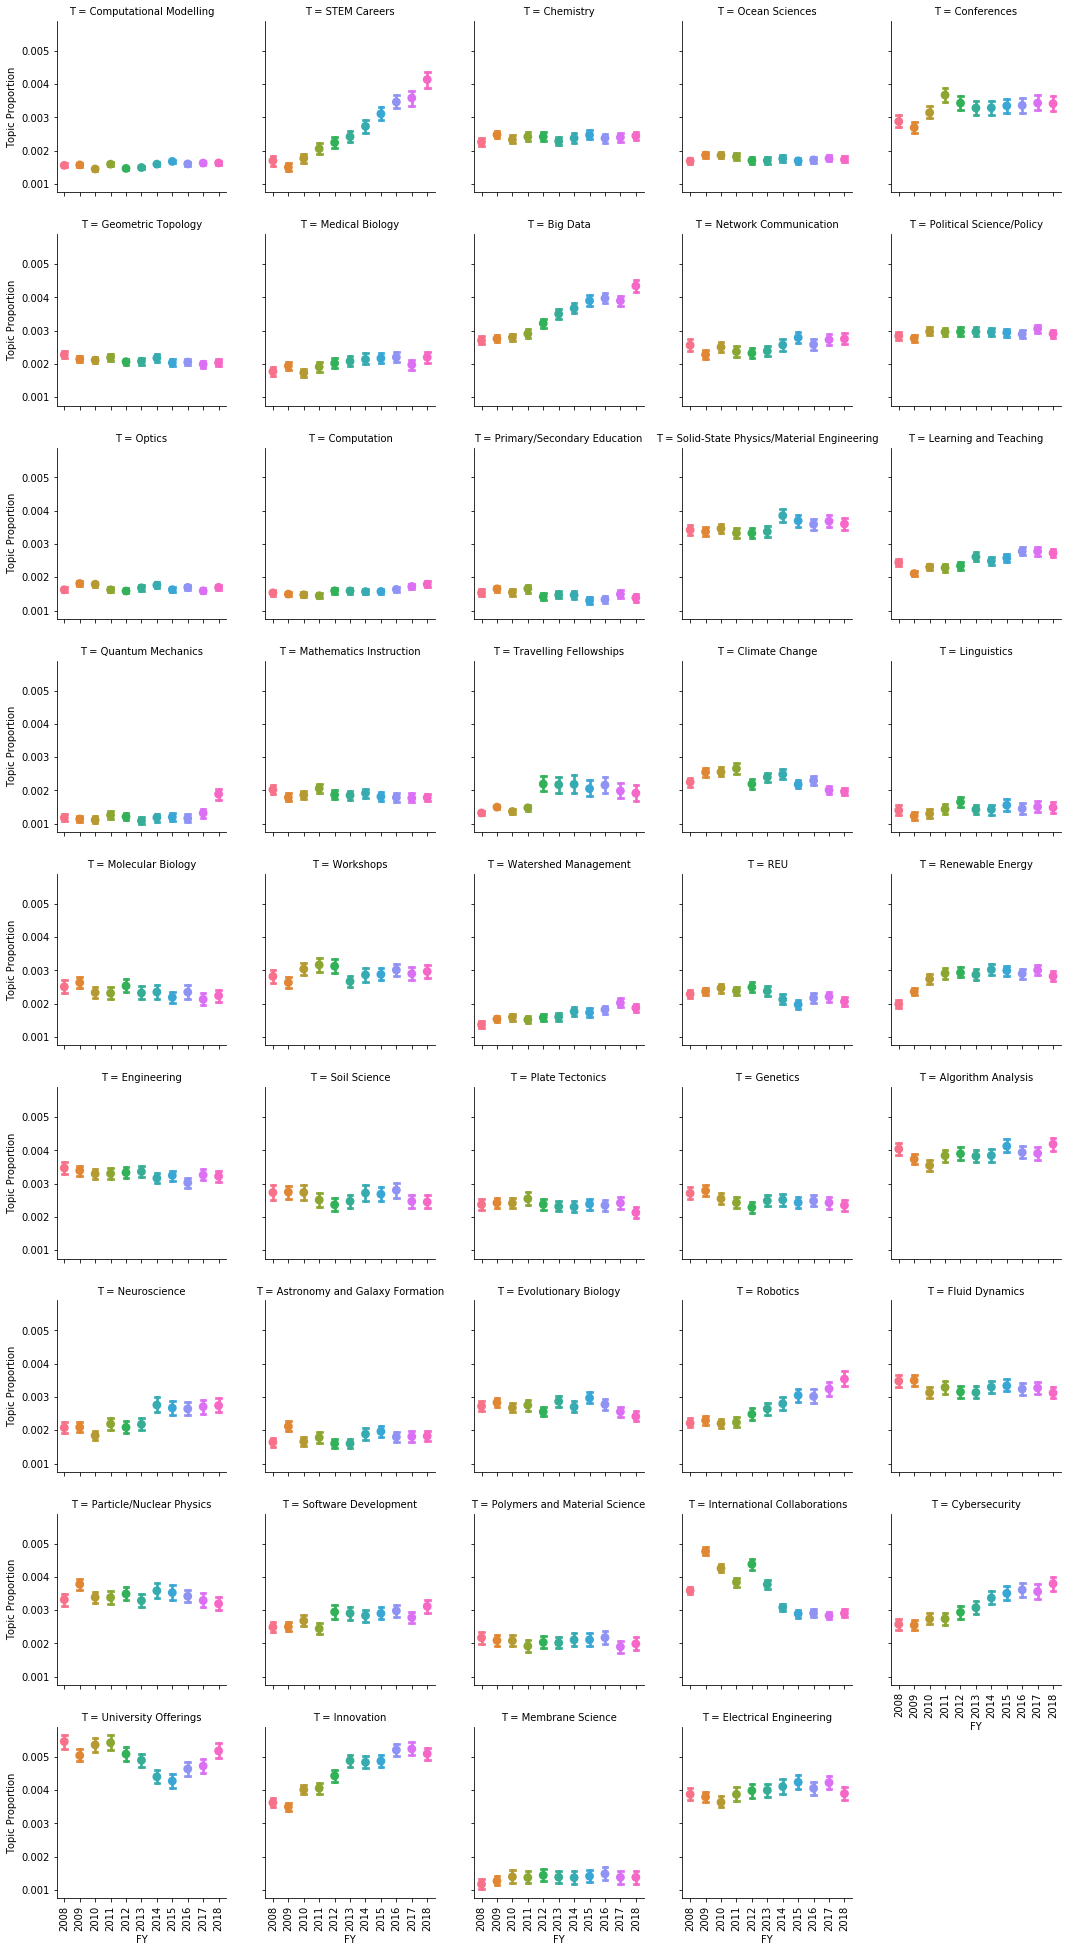

In [49]:
###############
#Create a plot showing topic funding over time +/- on SD for the overall database.
###############

#Initialize a grid of plots with an Axes for each topic
grid = sns.FacetGrid(melted, col="T",hue='FY', #T is used because that is the proper topic name
                     col_wrap=5)

# Draw a line plot to show the trajectory over time
grid.map(sns.pointplot, "FY", "Topic Proportion",order=range(2008,2019),capsize=.3)


# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
for i, ax in enumerate(grid.axes.flat):
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
plt.savefig('/home/sc2pg/src/prnd/publicrd/graphics/Trends in Topic Proportion NSF NMF44.png',dpi=900,bbox_inches='tight')

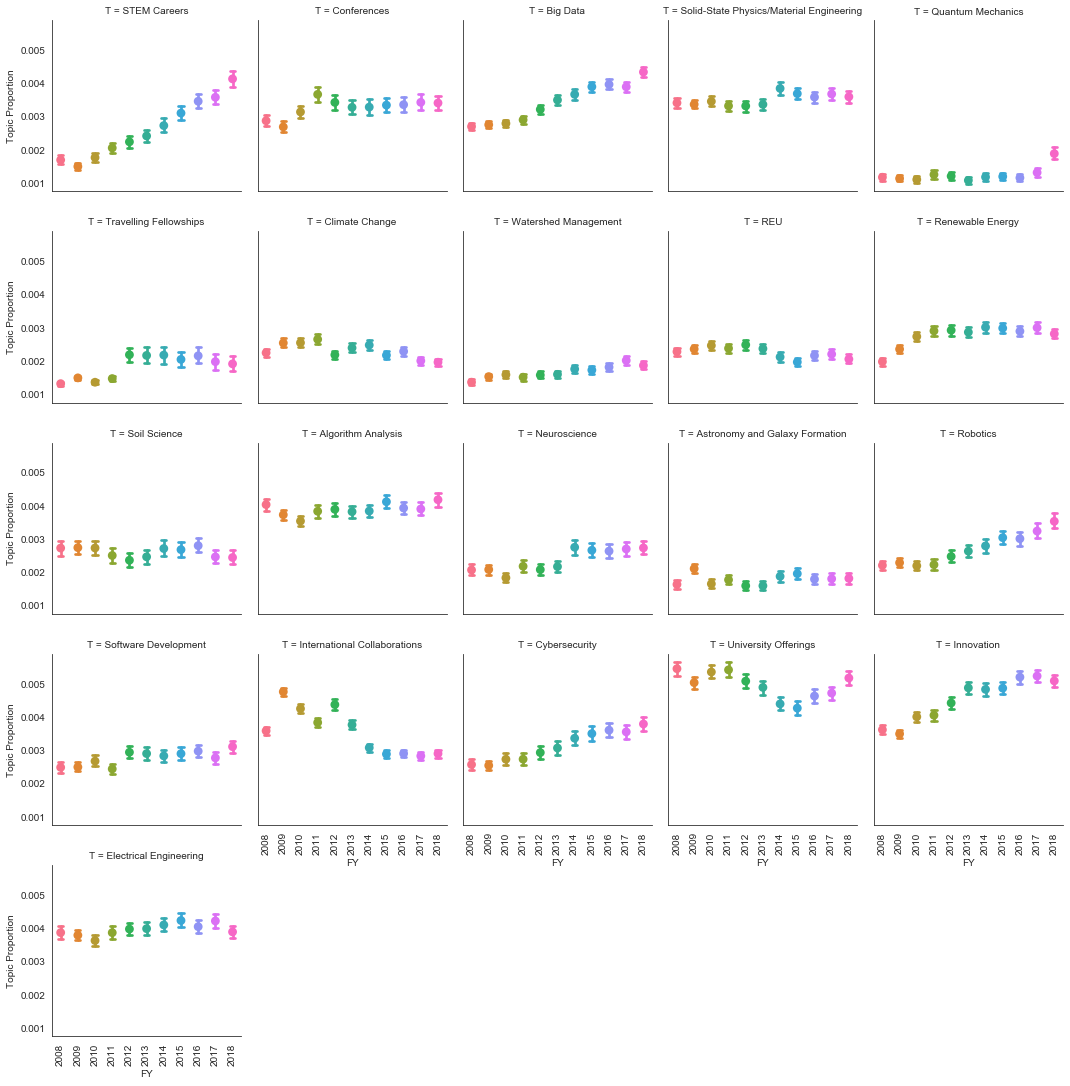

In [99]:
#Same plot as above, but uses only a subset of topics that had interesting patterns

#Initialize a grid of plots for each area of interest
grid = sns.FacetGrid(melted.loc[melted['Topic'].isin(['Topic_'+str(x) for x in [1,4,7,13,15,17,18,22,23,24,26,29,30,31,33,36,38,39,40,41,43]]  )                                    
                               ], col="T",hue='FY',
                     col_wrap=5)

# Draw a line plot to show the trajectory over time
grid.map(sns.pointplot, "FY", "Topic Proportion",order=range(2008,2019),capsize=.3)



# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
for i, ax in enumerate(grid.axes.flat):
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
plt.savefig('/home/sc2pg/src/prnd/publicrd/graphics/Trends in Topic Proportion NSF NMF Interesting Topics.png',dpi=900,bbox_inches='tight')

In [50]:
################333
#Examine the full abstracts highly representative of a single topic to better describe them
##################

threshold=.2
for topic in range(44):
    print('Topic:'+str(topic))
    mini=df.loc[df['Topic_'+str(topic)]>threshold,'ABSTRACT']
    print('{} abstracts have a proportion greater than {} of this topic. Abstracts posted below'.format(len(mini),threshold))
    if len(mini)<5:
        for x in mini:
            print(x)
    else:
        for x in mini[:5]:
            print(x)

Topic:0
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Topic:1
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Topic:2
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Topic:3
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Topic:4
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Topic:5
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Topic:6
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Topic:7
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Topic:8
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Topic:9
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Topic:10
0 abstracts have a proportion greater than 0.2 of this topic.

In [51]:
##############3
#Getting the starting sentences for all abstracts highly representative of a single topic
###############

for topic in range(44):
    print('Topic:'+str(topic))
    mini=df.loc[df['Topic_'+str(topic)]>threshold,'ABSTRACT']
    print('{} abstracts have a proportion greater than {} of this topic. Abstracts posted below'.format(len(mini),threshold))
    print(mini)

Topic:0
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Series([], Name: ABSTRACT, dtype: object)
Topic:1
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Series([], Name: ABSTRACT, dtype: object)
Topic:2
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Series([], Name: ABSTRACT, dtype: object)
Topic:3
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Series([], Name: ABSTRACT, dtype: object)
Topic:4
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Series([], Name: ABSTRACT, dtype: object)
Topic:5
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Series([], Name: ABSTRACT, dtype: object)
Topic:6
0 abstracts have a proportion greater than 0.2 of this topic. Abstracts posted below
Series([], Name: ABSTRACT, dtype: object)
Topic:7
0 abstracts have a proportion greater than 0.2 

In [52]:
#Number of cases where topic proportion is greater than 50% (ie each document can only be included once)
#About 50% of our cases have at least 50% of their topic distribution in a single topic
len(melted.loc[melted['Topic Proportion']>.5])

0

In [53]:
shrunk=melted.groupby(['Topic','FY'])['Topic Funding'].sum().unstack().apply(lambda x: x/1000000).T
#shrunk.to_csv('TotalFundingPerTopicPerYearNSF.csv')

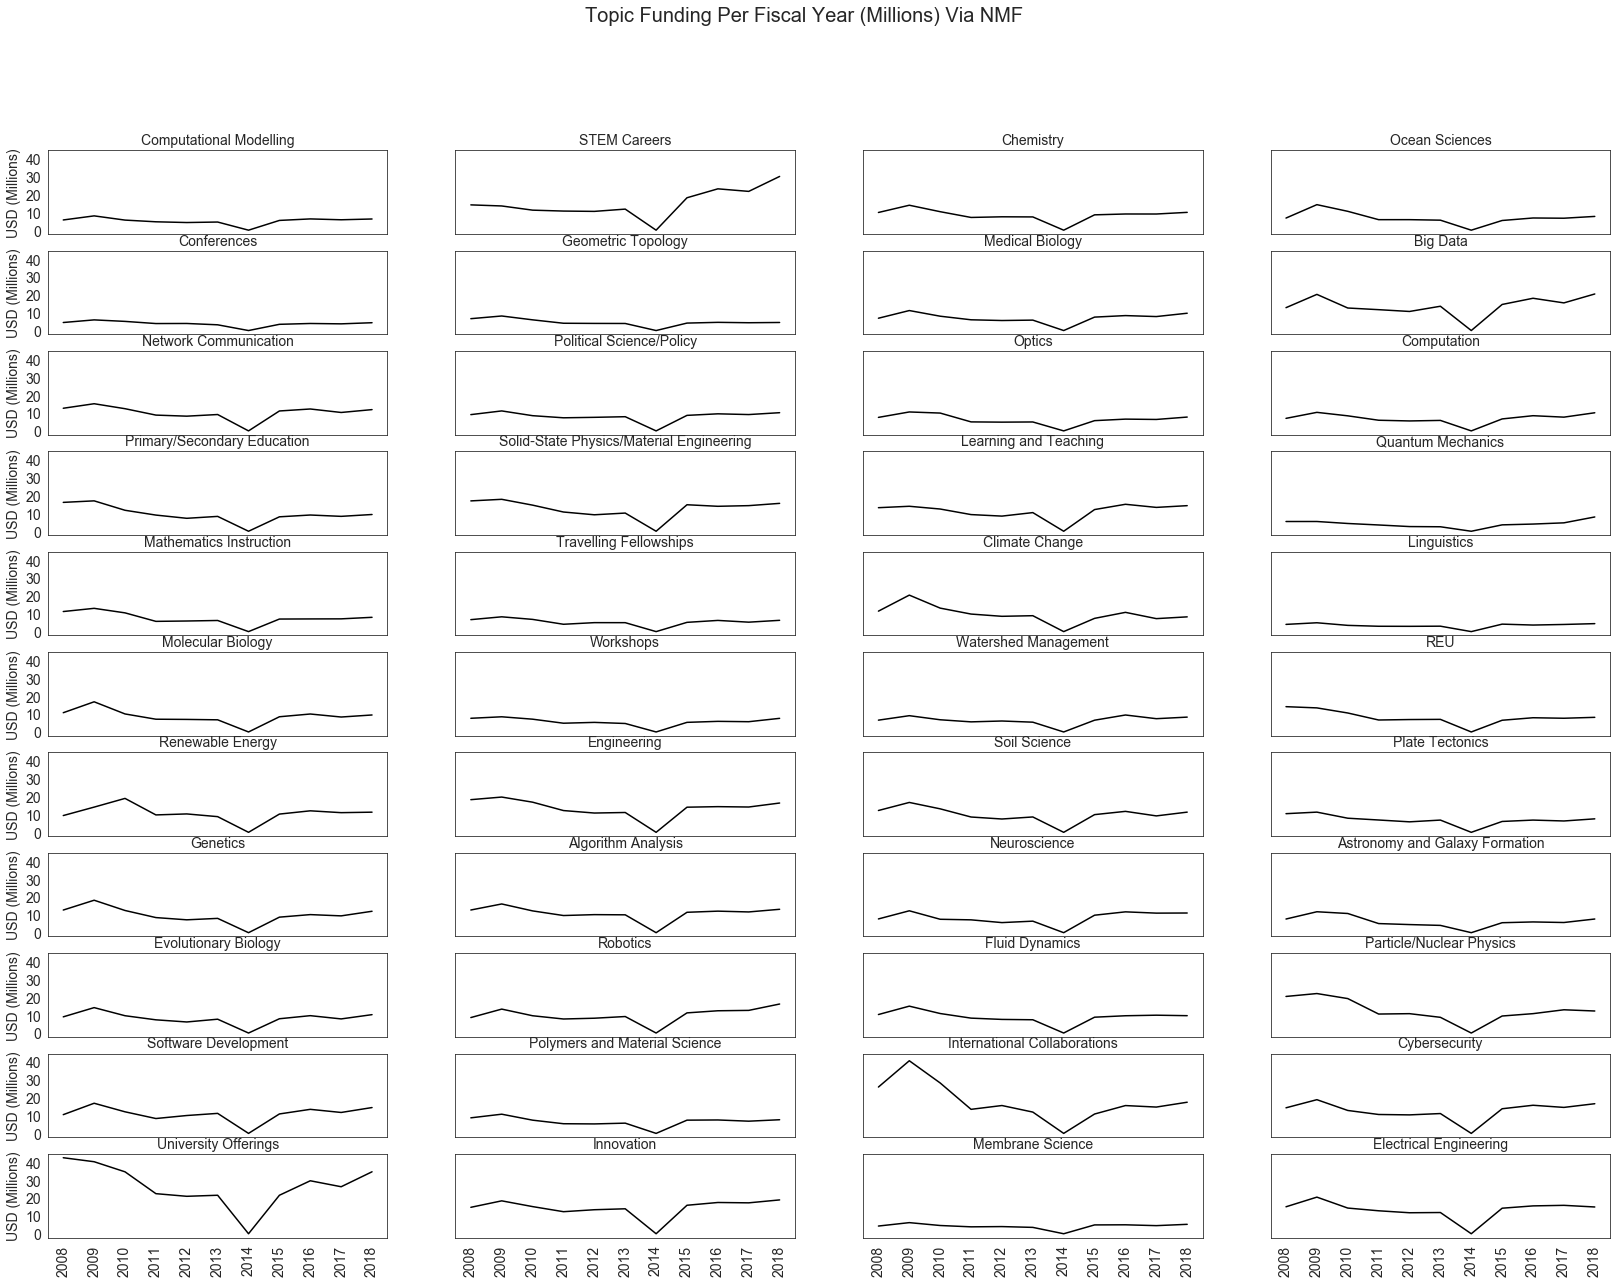

In [112]:
sns.set_style('white')
fig, ax = plt.subplots(11,4,sharex=True,sharey=True,figsize=(28,20))
top_num=0
for x in range(11):
    for y in range(4):
        shrunk['Topic_'+str(top_num)].plot(ax=ax[x,y],color='k')
        plt.sca(ax[x,y])
        plt.ylabel('USD (Millions)',size=14)
        plt.xticks(np.arange(2008,2019),rotation=90,size=14)
        plt.xlabel('')
        plt.yticks(range(0,50,10),size=14)
        plt.title(titles[top_num],size=14)
        top_num+=1
plt.suptitle('Topic Funding Per Fiscal Year (Millions) Via NMF',size=20)
plt.savefig('/home/sc2pg/src/prnd/publicrd/graphics/FundingChartsNSFNMF.png',dpi=400,bbox_inches='tight')

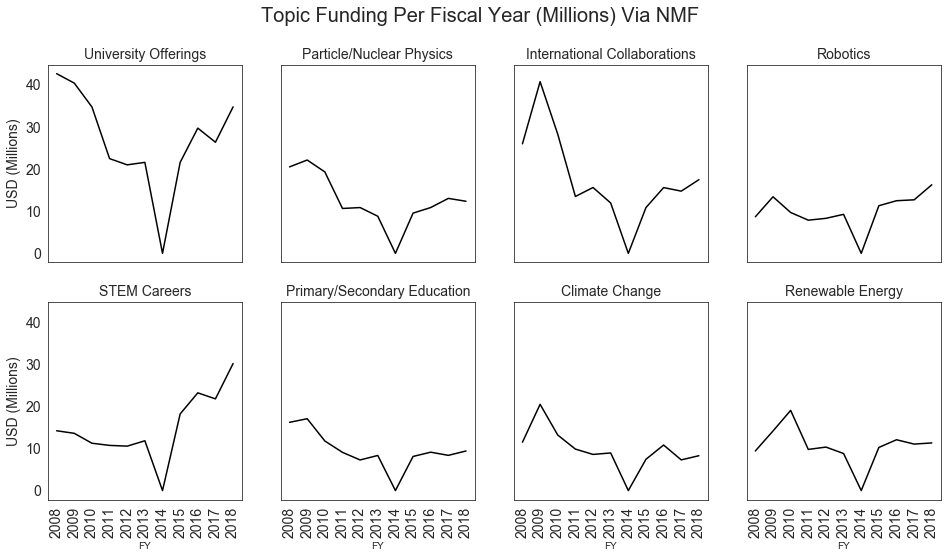

In [115]:
#toi=[12,7,9,17,20,21,32,34,42,46,47,48]
toi=[40,35,38,33,1,12,18,24]
sns.set_style('white')
fig, ax = plt.subplots(2,4,sharex=True,sharey=True,figsize=(16,8))
top_num=0
for x in range(2):
    for y in range(4):
        shrunk['Topic_'+str(toi[top_num])].plot(ax=ax[x,y],color='k')
        plt.sca(ax[x,y])
        plt.ylabel('USD (Millions)',size=14)
        plt.xticks(np.arange(2008,2019),rotation=90,size=14)
        plt.title(titles[toi[top_num]],size=14)
        plt.yticks(range(0,50,10),size=14)
        top_num+=1
plt.suptitle('Topic Funding Per Fiscal Year (Millions) Via NMF',size=20)
plt.savefig('/home/sc2pg/src/prnd/publicrd/graphics/FundingChartsNSFNMFInteresting Topics.png',dpi=400,bbox_inches='tight')

In [52]:
def top_topic(record):
    l=list(record[['Topic_'+str(x) for x in range(44)]])
    return l.index(max(l))
df['Max topic']=df.apply(top_topic,axis=1)
    
vc=df.groupby('FY')['Max topic'].value_counts()
melted['Num_docs_that_year']=melted.apply(lambda x: vc[x['FY']][int(x['Topic'].split('_')[1])],axis=1) #Note that this leads to REDUNDANT VALUES for all FY and Topics, so don't use extensively.

In [76]:
#
mini=pd.concat([x[1].iloc[0] for x in melted.groupby(['Topic','FY'])],axis=1).T
melted.drop(['Num_docs_that_year'],inplace=True)
mini['Num_docs_that_year']=mini['Num_docs_that_year'].astype(int)
sum(mini['Num_docs_that_year'])

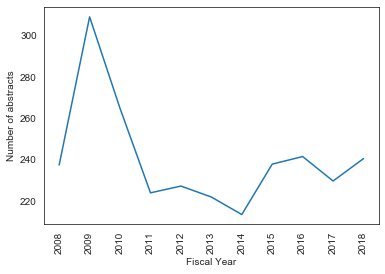

In [95]:
sns.lineplot(data=mini,x='FY',y='Num_docs_that_year',ci=None)
plt.ylabel('Number of abstracts')
plt.xticks(range(2008,2019),rotation=90)
plt.xlabel('Fiscal Year')
plt.savefig('/home/sc2pg/src/prnd/publicrd/graphics/Total abstracts in NSF dataset by year.png',dpi=400,bbox_inches='tight')

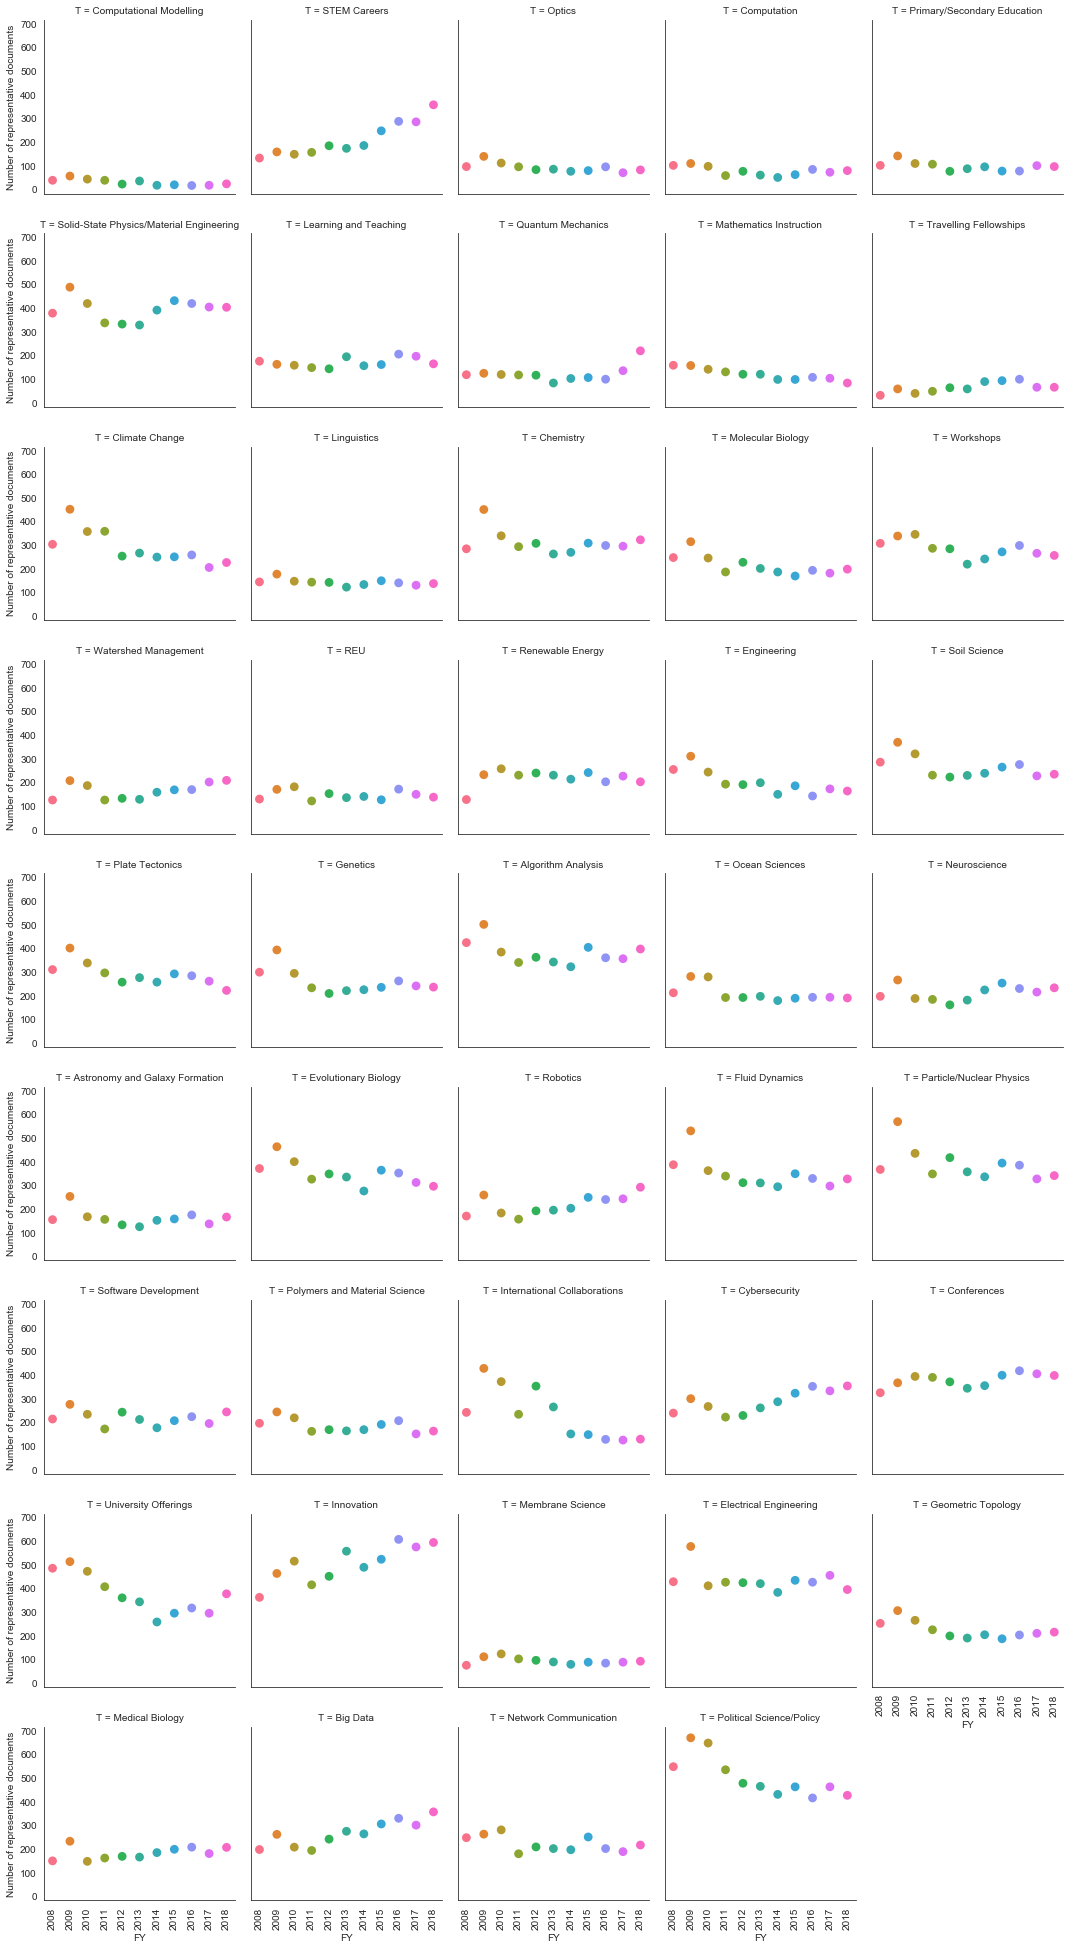

<Figure size 432x288 with 0 Axes>

In [96]:
###############

#Initialize a grid of plots with an Axes for each topic
grid = sns.FacetGrid(mini, col="T",hue='FY', #T is used because that is the proper topic name
                     col_wrap=5)

# Draw a line plot to show the trajectory over time
grid.map(sns.pointplot, "FY", "Num_docs_that_year",order=range(2008,2019),capsize=.3)


# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

for i, ax in enumerate(grid.axes.flat):
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
    if i%5==0:
        ax.set_ylabel('Number of representative documents') #Add ylabel if appropriate
plt.show()
plt.savefig('/home/sc2pg/src/prnd/publicrd/graphics/Represtantive abstracts in NSF dataset by year and topic.png',dpi=400,bbox_inches='tight')